# Бинарная линейная классификация

## Теоретическая часть

### Предсказания в бинарной линейной классификации
__Вспомнить из лекции:__
* Как выполняются предсказания в бинарной линейной классификации?
* Как интерпретировать веса?
* Вспомните обозначения $\langle \cdot, \cdot \rangle$, $sign(z)$, $[z>a]$, $\sigma(z)$.

### Задача 1.
Какое предсказание вернет бинарный линейный классификатор $a(x) = sign(\langle w, x \rangle+w_0)$ для объекта $x=(1, 0, 0, 1, 1)$ при использовании весов $w=(0.1, -0.2, 0.5, -1.1, 0)$ и $w_0=0.35$?


### Решение.

* Сначала запишем **скалярное произведение** (**dot or scalar product**)<br>$\langle w, x \rangle = w_1 x_1 + \dots + w_d x_d$
<br><br>

* В задаче $d=5$<br>где $d$-размерность обоих векторов (число признаков)
<br><br>

* В скобках получится значение<br>$0.1\cdot1 - 0.2\cdot0 + 0.5\cdot 0 -1.1 \cdot 1 + 0 \cdot 1 + 0.35 = -0.65$
<br><br>

* Знак отрицательный, значит<br>$a(x) = -1$

In [1]:
result = 0.1*1-0.2*0+0.5*0-1.1*1+0*1+0.35
print(result)

-0.65


### Задача 2.
Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1, 2)$, $w_0=0.5$, задача бинарной классификации с двумя признаками.


### Решение.

* Чтобы предсказать в линейной классификации, мы следуем этой формуле: $a(x) = sign(\langle w, x \rangle+w_0)$
    * если выражение в скобках больше 0, то есть класс +1
    * если выражение в скобках меньше 0, то есть класс -1
    * если выражение в скобках равно 0 (на практике очень редко), то либо отказываемся от классификации либо выбираем случайный класс
* Мы можем сделать предсказание для любого возможного объекта, и получить области классов +1 и -1. 
* Разделяющей границей этих двух областей будет прямая, поэтому классификация линейная.

-1.0
1.0


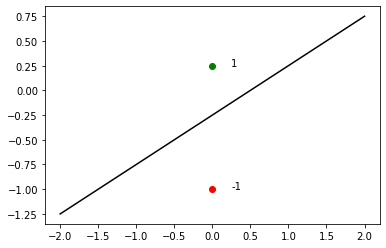

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# параметры классификатора
w = np.array([-1,2])
w0 = 0.5

# для проверки
test = np.array([[0,-1],[0,0.25]])

# строим разделяющую прямую
a = -w[0] / w[1] # угол наклона прямой
xx = np.linspace(-2, 2, 100)
yy = a * xx - w0 / w[1] # уравнение прямой

plt.plot(xx, yy, 'k-')

# для теста
for x in test:
    print(np.sign(np.dot(w,x) + w0))
    
plt.scatter(test[0][0],test[0][1],color='r')
plt.scatter(test[1][0],test[1][1],color='g')
plt.text(0.25,-1,'-1')
plt.text(0.25,0.25,'1');

__Вспомнить из лекции:__
* Как выполняются предсказания в логистической регрессии?
* Что такое сигмоида? Какое ее свойство используется в бинарной классификации?
* Вероятность чего предсказывается в логистической регрессии?
* Почему логистическая регрессия является частным случаем бинарной классификации?

### Задача 3.
Постройте и визуализируйте решающее правило логистической регрессии по одному признаку с его весом 2 и свободным членом 0.6 в осях координат: первый признак - вероятность класса +1. Укажите, для каких $x$
 будет предсказан класс +1, для каких - класс -1, если бинаризация выполняется по порогу 0.5 на вероятность класса +1.
 

### Решение.

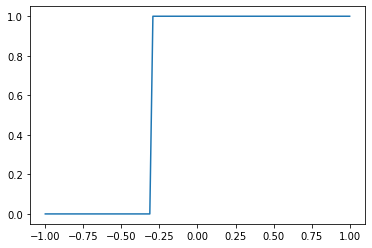

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# сигмоида
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def activ(x):
    f = sigmoid(x)
    return f >= 0.5

# параметры классификатора
w = 2
w0 = 0.6

xx = np.linspace(-1,1,100)
yy = activ(w * xx + w0)
plt.plot(xx, yy, '-');

### Задача 4 (дополнительно).
В бинарных классификаторах можно использовать разные пороги бинаризации $T$: классификатор $a(x) = sign(\langle w, x\rangle +w_0 - T)$ возвращает класс +1, если выражение $\langle w, x\rangle +w_0$ больше $T$, и -1, если выражение меньше $T$. Аналогично можно менять пороги $P$ в логистической регрессии: если вероятность класса +1 больше порога $P$, предсказывается класс +1, если меньше - класс -1. Как связаны пороги $T$ и $P$?


### Решение.

__Обратите внимание:__ аналогично линейной регрессии, в линейной классификации можно добавить единичный константный признак в матрицу объекты-признаки $X$. В этом случае свободный член $w_0$ в формулах не пишется, так как входит в общий вектор весов $w$.

### Обучение бинарной линейной классификации
__Вспомнить из лекции:__
* Как обучаются бинарные линейные классификаторы? Что такое верхняя оценка на пороговую функцию потерь? Для чего верхние оценки используются? Какие верхние оценки часто используют?
* Как обучается логистическая регрессия? Какой функционал качества в ней оптимизируют? Как он связан с логистической функцией потерь?
* Каким методом в бинарной линейной классификации решают оптимизационную задачу? Можно ли найти оптимальные веса аналитически, как в линейной регрессии?

### Задача 5.

Предположим, что на определенной обучающей выборке два класса можно линейно разделить в признаковом пространстве. В этом случае оптимальные веса логистической регрессии будут бесконечными. Почему?


### Решение.

Если веса логистической регрессии будут бесконечными, то в зависимости от знака x мы получим либо 1 (w*x > 0), либо 0 (если w*x < 0) поскольку 1/(1+exp(-inf)) -> 1 и при +inf -> 0 что аналогично вер-ти. Другими словами мы можем со 100% уверенностью отнести объект к одному из классов без учета промежуточных значений от [0..1] так как они изначально линейно разделимы.

### Задача 6 (дополнительно).
Выведите логистическую функцию потерь на основе метода максимального правдоподобия для обучения логистической регрессии.


### Решение.

## Практическая часть
В практической части мы обучим логистическую регрессию на данных кредитного скорринга, проанализируем веса модели, научимся работать с категориальными признаками в линейных моделях.

In [4]:
import pandas as pd

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) (задача кредитного скоринга). Для целей семинара данные были преобразованы в немного другой формат.

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [6]:
tab = pd.read_csv("gdrive/My Drive/Colab Notebooks/data/scoring.csv", sep = ',')

In [7]:
type(tab)

pandas.core.frame.DataFrame

In [8]:
tab.head() # вывести первые строки

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

In [9]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

Признаки в основном числовые.

In [10]:
tab["target"].value_counts()

1    300
0    300
Name: target, dtype: int64

Классы сбалансированы.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [11]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [12]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


In [13]:
X.shape, y.shape # атрибут shape показывает размерности матрицы

((600, 19), (600,))

#### Разделение выборки

In [14]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

In [15]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [16]:
y_train.value_counts()

1    222
0    198
Name: target, dtype: int64

In [17]:
y_test.value_counts()

0    102
1     78
Name: target, dtype: int64

In [18]:
X_train.shape, y_train.shape

((420, 19), (420,))

#### Нормируем данные

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Импортируем класс модели

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.metrics import accuracy_score # функция оценки качества

In [23]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = clf_lr.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.65

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков. 
В линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef\_ и появляются, конечно, только после вызова процедуры обучения.

In [26]:
clf_lr.coef_

array([[ 0.15701751, -0.35117629,  0.42272442, -0.10498686,  0.15604348,
         0.3081874 , -0.04441676,  0.00828341,  0.08930901, -0.22236021,
         0.00652646, -0.01928117,  0.08708093, -0.19196903,  0.29808718,
        -0.06557342,  0.28969653, -0.20093263,  0.2303662 ]])

### Задача 7.

Оформить веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.

In [27]:
clf_lr.coef_.shape

(1, 19)

In [28]:
import numpy as np
display(np.max(clf_lr.coef_))
display(np.min(clf_lr.coef_))

0.42272441813913486

-0.3511762906346754

### Решение.

In [29]:
# to save the weight for each feature
coeffs = np.mean(clf_lr.coef_, axis=0)

# to save the columns of X_train
xtraincolumns = pd.DataFrame(X_train, columns = X.columns)

# to save features names from the features dataframe
features = xtraincolumns.columns.values.tolist()

In [30]:
# оформить веса признаков в виде датафрейма: первый столбец — имя признака, второй столбец — вес

weights_df = pd.DataFrame({'Feature':features, 'Weight':coeffs})
weights_df

,Feature,Weight
0,account,0.157018
1,duration,-0.351176
2,credit_history,0.422724
3,amount,-0.104987
4,savings,0.156043
5,employment,0.308187
6,guarantors,-0.044417
7,residence,0.008283
8,age,0.089309
9,credits_number,-0.222360


In [31]:
# отсортировать датафрейм по увеличению веса

weights_df.sort_values('Weight')

,Feature,Weight
1,duration,-0.351176
9,credits_number,-0.222360
17,housing_rent,-0.200933
13,foreign,-0.191969
3,amount,-0.104987
15,life_insurance,-0.065573
6,guarantors,-0.044417
11,maintenance_people,-0.019281
10,job,0.006526
7,residence,0.008283


In [32]:
import plotly.express as px

fig = px.bar(
    x = coeffs,
    y = xtraincolumns.columns,
    orientation = 'h',
    color = coeffs,
    color_continuous_scale = [(0, 'red'), (1, 'blue')],
    labels = {'x': "Coefficient Value", 'y':"Feature Name"},
    title = "Feature Importance from Model Weights"
)
fig.show()

Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы.

Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус", хотя и с маленьким весом.

__Обратите внимание:__ интерпретировать величину весов можно, только если данные отнормированы. Иначе модуль веса будет зависеть от масштаба признака.

#### Работа с категориальным признаком

Применим метод one-hot-encoding к переменной "цель получения кредита", чобы включить ее в модель. Для этого воспользуемся функцией pd.get_dummies

In [33]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [34]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,0,0,0,0,1,0,0,0,0,0


In [35]:
# удаляем целевую переменную с помощью метода drop
X_ohe = tab_ohe.drop("target", axis=1)
# axis=1 показывает, что мы отим удалить столбец, а не строку (axis=0)

In [36]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, test_size=0.3, shuffle=True, random_state=0)

In [37]:
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

Благодаря фиксации random_state=0 мы получаем одно и то же разделение.

Оформим обучение классификатора и подсчет качества в виде функции:

In [38]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred)

In [39]:
print(get_accuracy(LogisticRegression()))

0.6666666666666666


Качество с новым признаком повысилось.

А что, если мы просто пронумеруем категории? Для этого воспользуемся классом LabelEncoder:

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])

In [42]:
X_le = tab[tab.columns[:-1]]

In [43]:
X_train_le, X_test_le, y_train, y_test  = train_test_split(X_le, y, test_size=0.3, shuffle=True, random_state=0)

In [44]:
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

In [45]:
def get_accuracy(clf):
    clf.fit(X_train_le, y_train)
    y_pred = clf.predict(X_test_le)
    return accuracy_score(y_test, y_pred)

In [46]:
print(get_accuracy(LogisticRegression()))

0.6555555555555556


При использовании LabelEncoding качество работы классификатора не улучшилось по сравнению с отсутствием категориального признака, что логично.